In [1]:
import pandas as pd
hr = pd.read_csv('hr_dataset.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
col_names = hr.columns.to_list()
print("Column Names:")
print(col_names)
print("\nSample Data:")
hr.head()

Column Names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample Data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
hr.shape

(14999, 10)

#### Our data is pretty clean with no null values. 

In [4]:
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
hr.sales.value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [11]:
hr.rename(columns={'sales': 'department'}, inplace=True)

In [12]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**The “left” column is the outcome variable recording 1 and 0.** 

**1 for employees who left the company and 0 for those who didn’t.**

In [13]:
hr.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

**11,428 employees are currently working in the company.**

In [14]:
hr.department.value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

- Department column has many categories. We need to reduce the categories for better modelling.
- Let's add $technical$, $support$, and $IT$ in one column to make our analysis easier.

In [23]:
hr.department = hr.department.apply(lambda x: x.replace('support', 'technical').replace('IT', 'technical')) 

In [24]:
hr.department.value_counts()

department
technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

## Creating variables for categorical variables

In [25]:
cat_vars = ['department', 'salary']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1 = hr.join(cat_list)
    hr = hr1

- Now the actual variables need to be removed after the dummy variable have been created

In [28]:
hr.drop(columns=['department', 'salary'], axis=1, inplace=True)

In [29]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

- The outcome variable is $left$, and all the other are predicators. 

In [32]:
hr_vars = hr.columns.values.tolist()
y = ['left']
X = [i for i in hr_vars if i not in y]

### Feature selection for Employee Turnover Prediction 
- Let's use the feature selection method to decide which variables are the best option that can predict employee turnover with great accuracy. There are a total of 18 columns in X, and now let's see how we can select about 10 from them.

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(hr[X], hr[y]) 
print(rfe.support_)
print(rfe.ranking_)  

/Users/deveshparashar/Projects/employee_turnover_model/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/deveshparashar/Projects/employee_turnover_model/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/deveshparashar/Projects/employee_turnover_model/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConv

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


/Users/deveshparashar/Projects/employee_turnover_model/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- You can see that our feature selection chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. Now, lets have a look at these columns:

In [39]:
cols = []
for i,val in zip(hr_vars, rfe.support_):
    if val and i!='left':
        cols.append(i) 
cols

['satisfaction_level',
 'last_evaluation',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_accounting',
 'department_hr',
 'department_technical',
 'salary_high']

In [40]:
X = hr[cols]
y = hr['left']

## **Logistic Regression Model to Predict Employee Turnover**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)  

LogisticRegression()

- Now let's check the accuracy of our Logistic Regression Model

In [47]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.765


## Random Forest Classification Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

- Now let's check the accuracy of our Random Forest Classification Model

In [46]:
print('Random Forest Accuracy: {}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.977


### Confusion Matrix for our Machine Learning Models

Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluate the accuracy of our machine learning classification.

$Random$ $Forest$

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2299
           1       0.95      0.96      0.95       701

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



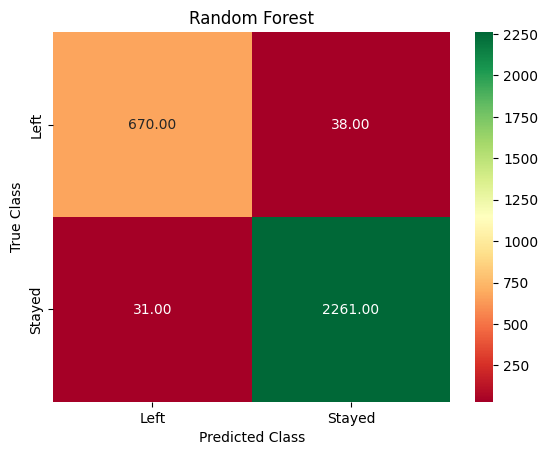

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_y_pred = rf.predict(X_test)
forest_cm = confusion_matrix(rf_y_pred, y_test, labels=[1,0])
sns.heatmap(forest_cm, cmap='RdYlGn', annot=True, fmt= '.2f', 
            xticklabels=['Left', 'Stayed'], yticklabels=['Left', 'Stayed'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Random Forest')
plt.show()

$Logistic$ $Regression$

In [58]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2299
           1       0.49      0.25      0.33       701

    accuracy                           0.77      3000
   macro avg       0.65      0.59      0.60      3000
weighted avg       0.73      0.77      0.73      3000



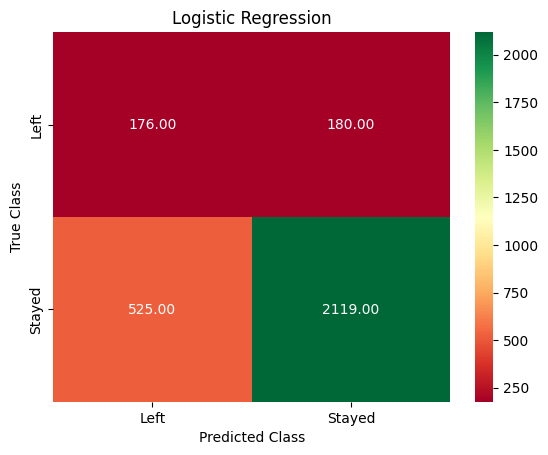

In [64]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = confusion_matrix(logreg_y_pred, y_test, labels=[1,0])
sns.heatmap(logreg_cm, annot=True, cmap= 'RdYlGn', fmt = '.2f', xticklabels=['Left', 'Stayed'], yticklabels=['Left', 'Stayed'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class') 
plt.title('Logistic Regression')
plt.show()

## Employee Turnover Prediction Curve

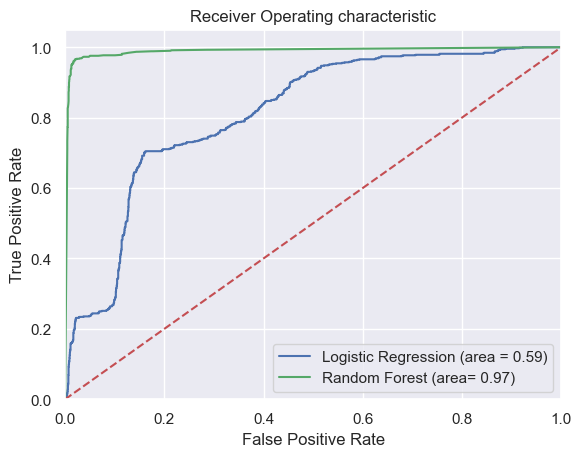

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure()
sns.set()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label= 'Random Forest (area= %0.2f)' % rf_roc_auc, color='g')
plt.plot([0,1], [0,1], 'r--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover, now let’s have a look at the feature importance of our random forest classification model.

In [70]:
import numpy as np
feature_labels = np.array(cols)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] * 100)))

department_hr-0.20%
department_accounting-0.23%
promotion_last_5years-0.25%
department_technical-0.66%
salary_high-0.86%
Work_accident-1.43%
last_evaluation-19.01%
time_spend_company-27.29%
satisfaction_level-50.06%


- According to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will leave the company, in ascending order.
- **satisfaction_level** is the most important feature